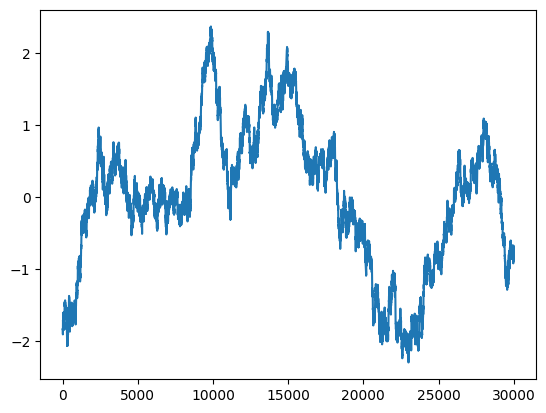

In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np

starting = 0
values = [starting]
for i in range(30000):
    values.append(values[-1] + np.random.normal())

values = (values - np.mean(values)) / np.std(values)
plt.plot(values)

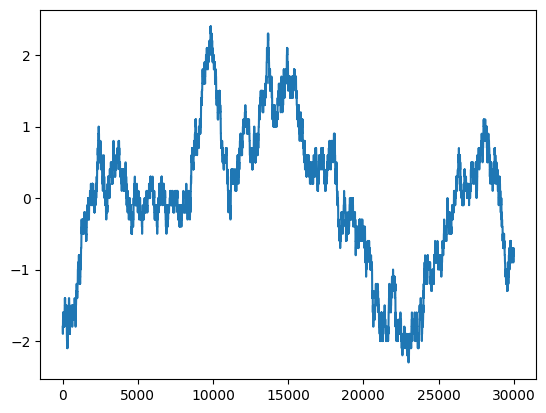

In [2]:
rounded_values = []
for value in values:
    rounded_values.append(round(value, 1))

plt.plot(rounded_values)

In [3]:
states = list(rounded_values)
import pandas as pd

policy = pd.DataFrame(0, index=states, columns=["buy", "sell"])

In [4]:
def find_action(policy, current_state):
    if policy.iloc[current_state, :].sum() == 0:
        return random.choice(["buy", "sell"])

    return policy.columns[policy.iloc[current_state, :].argmax()]

In [5]:
Action = dict({"buy": 0, "sell": 1})


def update_policy(reward, current_state, action):
    LEARNING_RATE = 0.1
    MAX_REWARD = 10
    DISCOUNT_FACTOR = 0.05

    return LEARNING_RATE * (
        reward
        + DISCOUNT_FACTOR * MAX_REWARD
        - policy.iloc[current_state, Action[action]]
    )

In [6]:
past_state_value = 0
past_action = "buy"
total_reward = 0.0
rewards = []

for i, current_state_value in enumerate(rounded_values):
    # do the action
    action = find_action(policy, i)

    # also compute reward from previous action and update state
    if past_action == "buy":
        reward = current_state_value - past_state_value

    if past_action == "sell":
        reward = past_state_value - current_state_value

    total_reward = total_reward + float(reward)

    policy.iloc[i, Action[action]] += update_policy(reward, i, action)

    # print(policy)
    rewards.append(total_reward)

    past_action = action
    past_state_value = current_state_value

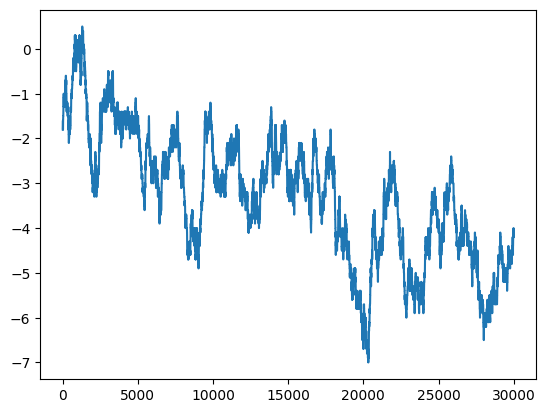

In [7]:
plt.plot(rewards)

<Axes: >

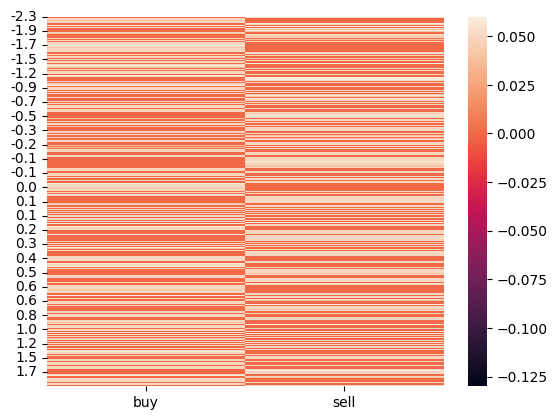

In [8]:
import seaborn as sns

sns.heatmap(policy.sort_index())